

**GRUPO <7>**

Pilar Arias, Álvaro García Cid, Yedra Martín, Amaya Sarasa


##Importamos librerías y datos

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [2]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Análisis  de texto en negrita datos

Comprobamos las dimensiones de los datos proporcionados:

In [ ]:
print(train_images.shape)

(60000, 28, 28)


Efectivamente, encontramos 60000 imágenes para el entrenamiento, de 28*28 píxeles. Más adelante deberemos cambiar las dimensiones de las imágenes, para así poderlas entrar correctamente a la primera capa de la red neuronal. 

Comprobamos la longitud de las etiquetas para comprobar que están todas, tanto en las fotos de entrenamiento como en las del test:

In [ ]:
len(train_labels)


60000

In [ ]:
len(test_labels)

10000

Es correcto, ya que para cada imagen, se tiene asociado una etiqueta como se deseaba.

A continuación, probamos a ver cómo se vería representada la imagen número 999:

In [5]:
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[1000]))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.38 0.33 0.38 0.43 0.42 0.34 0.38 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.07 1.   0.78 0.72 0.56 0.63 0.78 0.84 0.13 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.28 0.68 0.68 0.62 0.51 0.52 0.69 0.69 0.27 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.56 0.71 0.64 0.47 0.71 0.49 0.55 0.66 0.48 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.61 0.71 0.64 0.67 0.67 0.72 0.64 0.66 0.56 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.62 0.69 0.64 0.68 0.65 0.68 0.67 0.64 0.58 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.63 0.71 0.63 0.66 0.69 0.65 0.62 0.66 0.55 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0. 

Se puede asemejar a una camiseta, y efectivamente, comprobando con la etiqueta que se proporciona, se está representando de manera correcta.

In [ ]:
train_labels[1000]


1

Probamos otra manera de representar la imagen. 

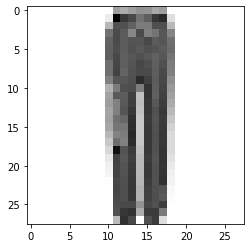

In [3]:
import matplotlib.pyplot as plt
digit = train_images[1000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

##Preparación de datos


Normalizamos las imágenes, y las representamos, para verificar que se ha realizado correctamente. 

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[1000]))

60000
(60000, 784)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Gracias al término one hot enconding, cambiamos el formato de las etiquetas. Lo que encontramos ahora es un vector de 10 bits, con todos los valores en 0, excepto un bit cuyo valor sea 1 cuya posición nos indicará a qué clase de ropa pertenece la imagen. 


In [7]:
def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Datos de entrenamiento vectorizados
one_hot_train_labels = to_one_hot(train_labels)
# Datos de test vectorizados
one_hot_test_labels = to_one_hot(test_labels)
print(one_hot_test_labels)


[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
print(one_hot_test_labels[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## Caso 1

Procedemos 

In [9]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


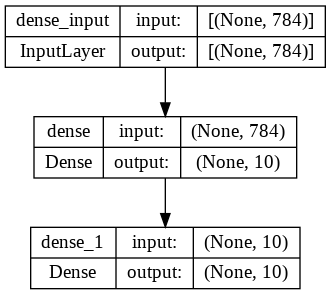

In [10]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

In [11]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [12]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 2.3022 - accuracy: 0.1008
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 2.3021 - accuracy: 0.1201
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 2.3020 - accuracy: 0.1176
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 2.3019 - accuracy: 0.1306
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 2.3018 - accuracy: 0.1260


In [13]:
test_loss, test_acc = network.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.3017 - accuracy: 0.2204
test_loss: 2.3017215728759766
test_acc: 0.22040000557899475


In [14]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax (predictions_array)
  if predicted_label== true_label:
    color = 'blue' 
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
 

Ejemplo de uso para ver la predicción de la 6ª figura de las imágenes de test.

## Caso 2

In [15]:
from keras import models
from keras import layers
network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network2.add(layers.Dense(10, activation='softmax'))
network2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


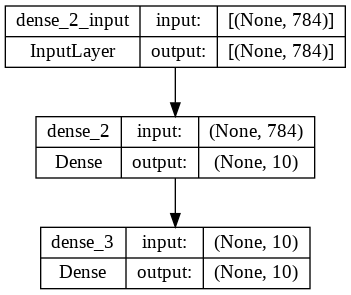

In [16]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network2, "my_first_model.png", show_shapes=True)

In [17]:
network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [18]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network2.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 2.1512 - accuracy: 0.4090
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 1.7021 - accuracy: 0.5077
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 1.3460 - accuracy: 0.5978
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 1.1275 - accuracy: 0.6421
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.9873 - accuracy: 0.6805


In [19]:
test_loss, test_acc = network2.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.9397 - accuracy: 0.6892
test_loss: 0.9396671056747437
test_acc: 0.6891999840736389


## Caso 2.2

In [25]:
from keras import models
from keras import layers
network22 = models.Sequential()
network22.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network22.add(layers.Dense(10, activation='softmax'))
network22.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


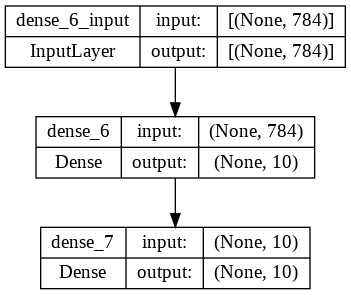

In [26]:
keras.utils.plot_model(network22, "my_first_model.png", show_shapes=True)

In [27]:
network22.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [28]:
network22.fit(train_images, one_hot_train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 2s 4ms/step - loss: 2.1756 - accuracy: 0.2376
Epoch 2/25
469/469 [==============================] - 2s 4ms/step - loss: 1.8217 - accuracy: 0.4535
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: 1.4886 - accuracy: 0.5330
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: 1.2440 - accuracy: 0.5811
Epoch 5/25
469/469 [==============================] - 1s 3ms/step - loss: 1.0895 - accuracy: 0.6342
Epoch 6/25
469/469 [==============================] - 1s 3ms/step - loss: 0.9827 - accuracy: 0.6714
Epoch 7/25
469/469 [==============================] - 1s 3ms/step - loss: 0.9017 - accuracy: 0.6964
Epoch 8/25
469/469 [==============================] - 2s 4ms/step - loss: 0.8378 - accuracy: 0.7156
Epoch 9/25
469/469 [==============================] - 3s 5ms/step - loss: 0.7870 - accuracy: 0.7317
Epoch 10/25
469/469 [==============================] - 1s 3ms/step - loss: 0.7473 - accuracy: 0.7419

In [29]:
test_loss, test_acc = network22.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5794 - accuracy: 0.7885
test_loss: 0.5794428586959839
test_acc: 0.7885000109672546


## Caso 3

In [30]:
from keras import models
from keras import layers
network3 = models.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network3.add(layers.Dense(10, activation='softmax'))
network3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


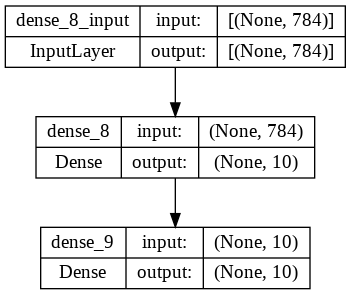

In [31]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network3, "my_first_model.png", show_shapes=True)

In [32]:
network3.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [33]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network3.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 2.3335 - accuracy: 0.1000
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 2.3039 - accuracy: 0.1000
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 2.3028 - accuracy: 0.0987
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0955
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0981


In [34]:
test_loss, test_acc = network3.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000
test_loss: 2.302623748779297
test_acc: 0.10000000149011612


##Caso 3.2 

En este caso, vamos a emplear la función flatten, que cambia directamente el tamaño de la imagen a vector

In [62]:


network32= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
]) 

network32.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 10)                7850      
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


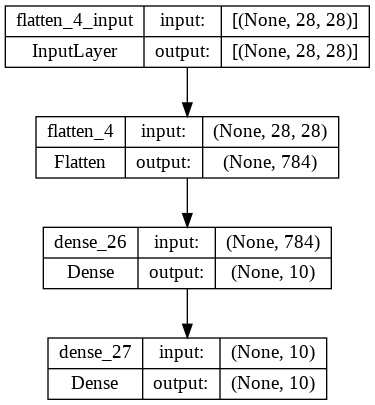

In [63]:
keras.utils.plot_model(network32, "my_first_model.png", show_shapes=True)

In [64]:
network32.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [65]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [66]:
network32.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 3.7686 - accuracy: 0.1067
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 2.2396 - accuracy: 0.1303
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 2.1818 - accuracy: 0.1522
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 2.0565 - accuracy: 0.1883
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 1.8292 - accuracy: 0.2238


In [67]:
test_loss, test_acc = network32.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.8039 - accuracy: 0.2295
test_loss: 1.8039029836654663
test_acc: 0.22949999570846558


## Caso 4

In [41]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [42]:
# Datos de entrenamiento vectorizados
one_hot_train_labels = to_one_hot(train_labels)
# Datos de test vectorizados
one_hot_test_labels = to_one_hot(test_labels)

In [43]:
from keras import models
from keras import layers
network4 = models.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network4.add(layers.Dense(10, activation='softmax'))
network4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


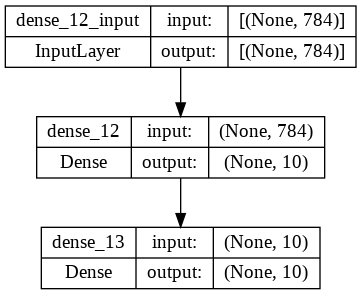

In [44]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network4, "my_first_model.png", show_shapes=True)

In [45]:
network4.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [46]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network4.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.4424 - accuracy: 0.5907
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.8721 - accuracy: 0.7755
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6539 - accuracy: 0.8101
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5542 - accuracy: 0.8249
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5034 - accuracy: 0.8331


In [47]:
test_loss, test_acc = network4.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.5103 - accuracy: 0.8240
test_loss: 0.5102732181549072
test_acc: 0.8240000009536743


## Caso 5

In [ ]:
from keras import models
from keras import layers
network5 = models.Sequential()
network5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network5.add(layers.Dense(10, activation='softmax'))
network5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


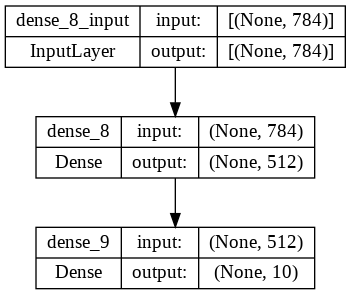

In [ ]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network5, "my_first_model.png", show_shapes=True)

In [ ]:
network5.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network5.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 1.0068 - accuracy: 0.7005
Epoch 2/5
469/469 [==============================] - 6s 14ms/step - loss: 0.6535 - accuracy: 0.7908
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.5786 - accuracy: 0.8112
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5382 - accuracy: 0.8214
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5113 - accuracy: 0.8296


In [ ]:
test_loss, test_acc = network5.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.5277 - accuracy: 0.8197
test_loss: 0.5277107954025269
test_acc: 0.8197000026702881


## Caso 6

In [ ]:
from keras import models
from keras import layers
network6 = models.Sequential()
network6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network6.add(layers.Dense(10, activation='softmax'))
network6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


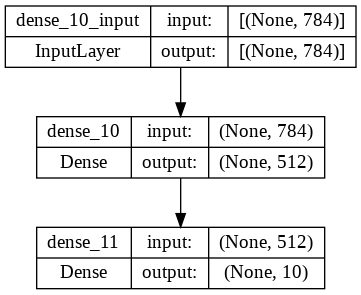

In [ ]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network6, "my_first_model.png", show_shapes=True)

In [ ]:
network6.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network6.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.5697 - accuracy: 0.7989
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3819 - accuracy: 0.8601
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3370 - accuracy: 0.8757
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3094 - accuracy: 0.8846
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2926 - accuracy: 0.8916


In [ ]:
test_loss, test_acc = network6.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3491 - accuracy: 0.8749
test_loss: 0.3490770757198334
test_acc: 0.8748999834060669


## Caso 7

In [ ]:
from keras import models
from keras import layers
network7 = models.Sequential()
network7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network7.add(layers.Dense(10, activation='softmax'))
network7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


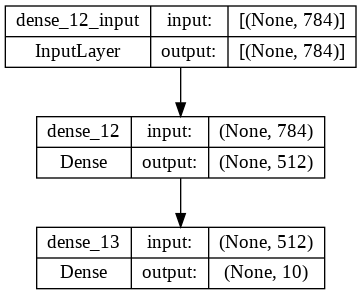

In [ ]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network7, "my_first_model.png", show_shapes=True)

In [ ]:
network7.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network7.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 1.6989 - accuracy: 0.5727
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 1.1239 - accuracy: 0.7104
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.9204 - accuracy: 0.7298
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.8195 - accuracy: 0.7431
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.7587 - accuracy: 0.7520


In [ ]:
test_loss, test_acc = network7.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.7479 - accuracy: 0.7523
test_loss: 0.7479049563407898
test_acc: 0.7523000240325928


##Caso 7.2

In [ ]:
network72 = models.Sequential()
network72.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network72.add(layers.Dense(10, activation='softmax'))
network72.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


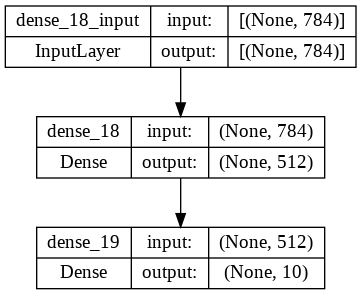

In [ ]:
keras.utils.plot_model(network72, "my_first_model.png", show_shapes=True)

In [ ]:
network72.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network72.fit(train_images, one_hot_train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 4s 8ms/step - loss: 0.8778 - accuracy: 0.7345
Epoch 2/25
469/469 [==============================] - 4s 8ms/step - loss: 0.7961 - accuracy: 0.7470
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.7438 - accuracy: 0.7558
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.7073 - accuracy: 0.7640
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6792 - accuracy: 0.7696
Epoch 6/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6568 - accuracy: 0.7754
Epoch 7/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6381 - accuracy: 0.7813
Epoch 8/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6221 - accuracy: 0.7855
Epoch 9/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6082 - accuracy: 0.7912
Epoch 10/25
469/469 [==============================] - 4s 8ms/step - loss: 0.5959 - accuracy: 0.7945

In [ ]:
test_loss, test_acc = network72.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.5255 - accuracy: 0.8133
test_loss: 0.5255478024482727
test_acc: 0.8133000135421753


## Caso 8

In [52]:
from keras import models
from keras import layers
network8 = models.Sequential()
network8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network8.add(layers.Dense(10, activation='softmax'))
network8.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


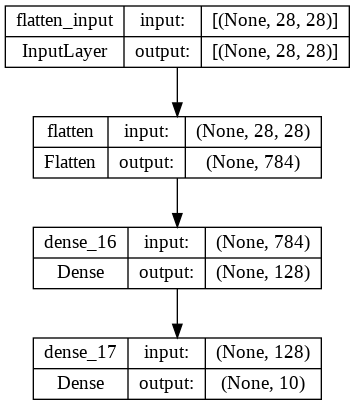

In [50]:
#Representar
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network8, "my_first_model.png", show_shapes=True)

In [51]:
network8.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 7.- ENTRENAMOS LA RED CON EL JUEGO DE DATOS DE ENTRENAMIENTO
network8.fit(train_images, one_hot_train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.5926 - accuracy: 0.7904
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.4289 - accuracy: 0.8442
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3851 - accuracy: 0.8603
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.3586 - accuracy: 0.8691
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3384 - accuracy: 0.8760


In [ ]:
test_loss, test_acc = network8.evaluate(test_images, one_hot_test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3877 - accuracy: 0.8590
test_loss: 0.3877131938934326
test_acc: 0.859000027179718


##Comparación predicción resultados imagen test 6

In [ ]:
predictions = network.predict(test_images)
predictions2 = network2.predict(test_images)
predictions3 = network3.predict(test_images)
predictions4 = network4.predict(test_images)
predictions5 = network5.predict(test_images)
predictions6 = network6.predict(test_images)
predictions7 = network7.predict(test_images)
predictions8 = network8.predict(test_images)

313/313 [==============================] - 1s 3ms/step


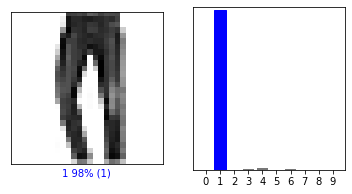

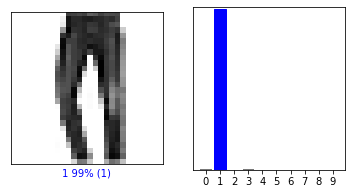

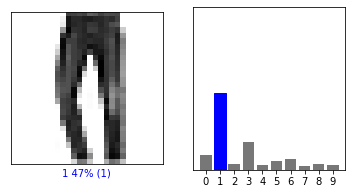

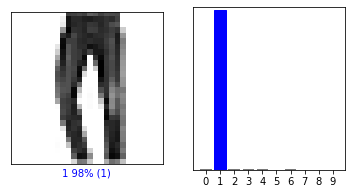

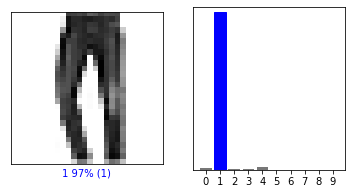

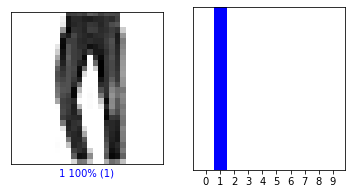

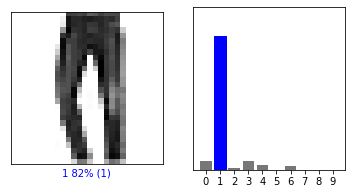

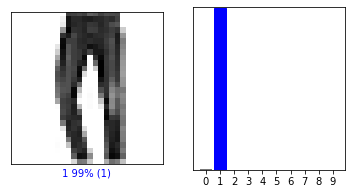

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions2[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions2[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions3[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions3[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions4[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions4[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions5[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions5[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions6[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions6[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions7[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions7[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions8[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions8[5], test_labels)
plt.show()